# Obdelava podatkov 2. del

In [1]:
import datetime
import csv
import pandas as pd
import numpy as np

In [2]:
column_names = [ 'Type A', 'Measure A', 'Units A',
                 'Type B', 'Measure B', 'Units B',
                 'Type C', 'Measure C', 'Units C', 
                 'Datetime']

In [8]:
df_redundant = pd.read_csv('data/DATA_rpi_data_long_R.csv', names=column_names)

In [9]:
df_redundant.head()

,Type A,Measure A,Units A,Type B,Measure B,Units B,Type C,Measure C,Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
4,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


In [ ]:
#numpy, pandas, matpolotlib, web scraping
#vsak sklop 3-4 vprašanja
#kako iz dveh slovarjev dobimo dataframe
#kako v numpyu naredimo list 50 vrednosti
#pridobi tabelo iz spleta
#izriši 2 arraya na grafu, legenda, subplot
#uvozi podatke, koliko podatkovnih tipov je, prvih 5 vrstic
#preimenuj stolpce
#odstrani podvojene vrednosti

In [10]:
df_redundant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 10 columns):
Type A       680 non-null object
Measure A    679 non-null object
Units A      679 non-null object
Type B       679 non-null object
Measure B    679 non-null object
Units B      673 non-null object
Type C       673 non-null object
Measure C    673 non-null float64
Units C      673 non-null object
Datetime     673 non-null object
dtypes: float64(1), object(9)
memory usage: 53.2+ KB


**Urejanje prikaza podatkov**



In [11]:
df_compact = df_redundant.copy()

In [12]:
map_dict = {'Measure A':'Ping (ms)', 'Measure B': 'Download (Mbit/s)', 'Measure C': 'Upload (Mbit/s)'}

In [15]:
df_compact.rename(columns=map_dict, inplace=True)

In [16]:
df_compact.head()

,Type A,Ping (ms),Units A,Type B,Download (Mbit/s),Units B,Type C,Upload (Mbit/s),Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
4,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


In [18]:
drop_list = ['Type A', 'Type B', 'Type C', 'Units A', 'Units B', 'Units C']

In [20]:
df_compact.drop(drop_list, axis=1, inplace=True)

In [21]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime
0,26.992,91.80,14.31,2016-11-24 13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27


In [22]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 679
Data columns (total 4 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Datetime             673 non-null object
dtypes: float64(1), object(3)
memory usage: 46.6+ KB


**Urejanje datuma in časa**



In [33]:
df_compact['Date'] = pd.to_datetime(pd.to_datetime(df_compact['Datetime']).dt.date)

In [34]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date,Time
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24,13:38:27


In [37]:
df_compact['Time'] = pd.to_datetime(df_compact['Datetime']).dt.time

In [38]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date,Time
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24,13:38:27


In [39]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 0 to 679
Data columns (total 6 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Datetime             673 non-null object
Date                 673 non-null datetime64[ns]
Time                 673 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 57.2+ KB


In [40]:
#druga možnost
#tukaj lahko urejamo še kaj dodatnega
df_compact['Date'] = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str).date())

In [41]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date,Time
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24,13:38:27


In [ ]:
#poglej kako zamenjati vejico s piko preden uvozimo podatke!!!

In [ ]:
df_compact.count

In [42]:
df_compact['Time'] = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str).time())

ValueError: NaTType does not support time

In [43]:
#kako popravimo ValueError: NaTType does not support time
temp = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str))
df_compact['Time'] = temp.dt.time

In [45]:
df_compact.drop('Datetime', axis=1, inplace=True)

In [46]:
type(df_compact['Time'][0])

datetime.time

In [47]:
df_compact.to_csv('data/OUT_rpi_data_compact.csv')

## Visualization


#### Clean and Analyze Data


**Čiščenje podatkov**



In [50]:
#zdaj je še 1x uvozil indekse iz shranjene datoteke ...
df_compact = pd.read_csv('data/DATA_rpi_data_compact.csv')
df_compact.head()

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [51]:
df_compact.drop('Unnamed: 0', inplace=True, axis=1)

In [54]:
#preštejmo manjkajoče vrednosti
NaNs_in_df = df_compact.isnull()

#dobimo dataframe
type(NaNs_in_df)

pandas.core.frame.DataFrame

In [55]:
#preštejemo število NaN po stolpcih
NaNs_in_df.sum()

Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 7
dtype: int64

In [56]:
#število čisto vseh NaN
NaNs_in_df.sum().sum()

23

In [57]:
#ali v eni vrstici
df_compact.isnull().sum().sum()

23

In [58]:
NaNs_total = df_compact.isnull().sum().sum()

In [74]:
#NaNs_pct = np.round(NaNs_total/df_compact.count().sum()*100, decimals=4)
#to ne dela ok, ker count() prešteje 3377 namesto 3400 vrednosti, ne šteje NaN vrednosti

In [76]:
NaNs_pct = np.round(NaNs_total/float(len(df_compact.columns)*len(df_compact))*100, decimals=4)

In [77]:
print(f'The DataFrame contains : {NaNs_total} NaNs, equal to {NaNs_pct}% of the measurements')

The DataFrame contains : 23 NaNs, equal to 0.6765% of the measurements


In [79]:
#tudi s .shape gre:
df_compact.shape

(680, 5)

In [82]:
df_compact_clean = df_compact.dropna()

In [84]:
df_compact_clean.shape

(673, 5)

In [85]:
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 679
Data columns (total 5 columns):
Ping (ms)            673 non-null object
Download (Mbit/s)    673 non-null object
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), object(4)
memory usage: 31.5+ KB


In [86]:
df_compact_clean.reset_index(inplace=True, drop=True)

In [87]:
df_compact_clean.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [102]:
df_compact_clean['Ping (m/s)'] = pd.to_numeric(df_compact_clean['Ping (ms)'].astype('float'))

/home/luka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
df_compact_clean.loc[:,'Ping (m/s)'] = pd.to_numeric(df_compact_clean.loc[:, 'Ping (m/s)'])
df_compact_clean.loc[:,'Download (Mbit/s)'] = pd.to_numeric(df_compact_clean.loc[:, 'Download (Mbit/s)'])

In [106]:
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 6 columns):
Ping (ms)            673 non-null float64
Download (Mbit/s)    673 non-null float64
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null datetime64[ns]
Time                 673 non-null object
Ping (m/s)           673 non-null float64
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 31.6+ KB


In [125]:
df_compact_clean['Time'] = pd.to_datetime(df_compact_clean['Time'])

In [115]:
df_compact_clean.drop(['Ping (m/s)'], inplace=True, axis=1)

/home/luka/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [126]:
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


#### KAGGLE.com

In [ ]:
#poglej kaggle.com -> primeri python kode

**Change values format.**

In [ ]:
columns = {'Ping (ms)_float': 'Ping (ms)',
           'Download (Mbit/s)_float': 'Download (Mbit/s)'}

In [119]:
reindexed_columns = ['Date', 'Time', 'Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)']

In [121]:
df_compact_clean = df_compact_clean.reindex(columns=reindexed_columns)

In [127]:
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


In [128]:
df_clean = df_compact_clean.copy()

In [131]:
#pogledamo povprečno vrednost in standardni odklon
means = df_clean.mean()
means

Ping (ms)            21.115452
Download (Mbit/s)    90.449212
Upload (Mbit/s)      13.697608
dtype: float64

In [132]:
st_dev = df_clean.std()
st_dev
#sklepamo, da je upload bolj stabilen kot download

Ping (ms)            5.161225
Download (Mbit/s)    3.465647
Upload (Mbit/s)      1.080471
dtype: float64

In [133]:
means['Ping (ms)']

21.115451708766724

## Basic statistics


**Calculate mean and standard deviation using Pandas.**


In [138]:
print(f"Average ping time: {means['Ping (ms)']} ± {st_dev['Ping (ms)']} ms")
print(f"Average download speed: {means['Download (Mbit/s)']} ± {st_dev['Download (Mbit/s)']} Mbit/s")
print(f"Average upload speed: {means['Upload (Mbit/s)']} ± {st_dev['Upload (Mbit/s)']} Mbit/s")

Average ping time: 21.115451708766724 ± 5.161225495663228 ms
Average download speed: 90.44921248142644 ± 3.4656470318152284 Mbit/s
Average upload speed: 13.697607726597328 ± 1.0804708853031768 Mbit/s


**Izračun minimalnih in maksimalnih vrednosti**


In [140]:
mins = df_clean.min()
maxs = df_clean.max()

In [141]:
print(f"Min ping time: {mins['Ping (ms)']} ms. Max ping time: {maxs['Ping (ms)']} ms")
#print(f'Min download speed: {mima_download[0]} Mbit/s. Max download speed: {mima_download[1]} Mbit/s')
#print(f'Min upload speed: {mima_upload[0]} Mbit/s. Max upload speed: {mima_upload[1]} Mbit/s')

Min ping time: 16.167 ms. Max ping time: 76.528 ms


In [143]:
#pregled vsega naenkrat
df_clean.describe().round(decimals=1)

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.0,673.0,673.0
mean,21.1,90.4,13.7
std,5.2,3.5,1.1
min,16.2,58.5,6.2
25%,19.1,90.2,13.6
50%,20.3,91.6,14.0
75%,21.8,92.1,14.2
max,76.5,92.9,14.6


In [144]:
df_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


In [153]:
maxt = df_clean['Ping (ms)'].idxmax()
mint = df_clean['Ping (ms)'].idxmin()

In [159]:
df_clean.iloc[maxt]['Time'].time()

datetime.time(17, 30, 6)

**Uporaba idxmin, idxmax and iloc**


In [163]:
print(f"Ping measure reached minimum on {} at {})

print(f'Ping measure reached maximum on {} at {}')

SyntaxError: EOL while scanning string literal (<ipython-input-163-c0203145c6e1>, line 1)

In [165]:
#korelacija
df_corr = df_clean.corr()
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


In [169]:
print(f"Correlation coefficient between ping and download: {df_corr.iloc[0,1]}")
#print(f'Correlation coefficient between ping and upload: {}')
#print(f'Correlation coefficient between upload and download: {}')

Correlation coefficient between ping and download: -0.04562611025837995


## Visualize Data



In [170]:
import matplotlib.pyplot as plt
%matplotlib inline 

**Plot Internet speed stats.**


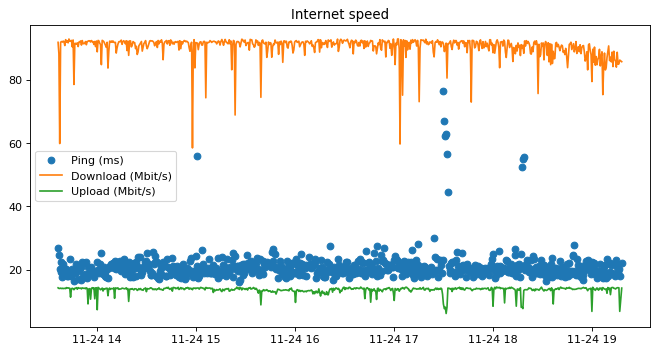

In [193]:
plt.figure(figsize=(10,5), dpi=80)

t = pd.to_datetime(df_clean['Date'].map(str) + ' ' + df_clean['Time'].dt.time.map(str))

plt.plot(t, df_clean['Ping (ms)'], 'o', label='Ping (ms)')
plt.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
plt.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')

plt.title('Internet speed')

plt.legend()
plt.show()

In [184]:
df_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


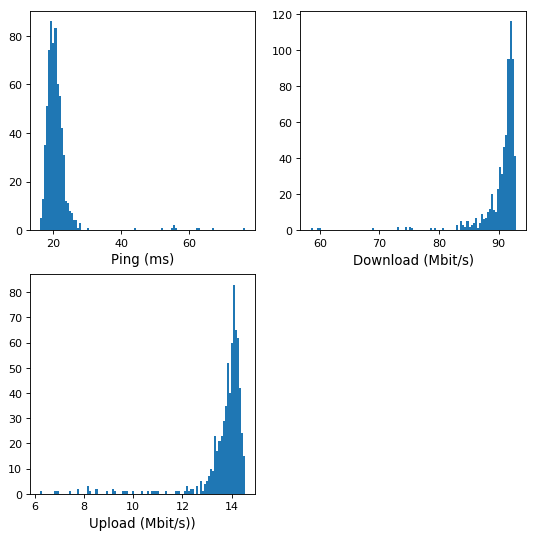

In [201]:
plt.figure(figsize=(8,8), dpi=80)

plt.subplot(2,2,1)
plt.hist(df_clean['Ping (ms)'], bins=100)
plt.xlabel('Ping (ms)', fontsize=12)
plt.tick_params(labelsize=10)

plt.subplot(2,2,2)
plt.hist(df_clean['Download (Mbit/s)'], bins=100)
plt.xlabel('Download (Mbit/s)', fontsize=12)
plt.tick_params(labelsize=10)

plt.subplot(2,2,3)
plt.hist(df_clean['Upload (Mbit/s)'], bins=100)
plt.xlabel('Upload (Mbit/s))', fontsize=12)
plt.tick_params(labelsize=10)

plt.show()

## Internet Meter Anomaly Detection 


**Create a Dataframe and modify the quantities**



#### INTERAKTIVNI GRAFI

In [202]:
df_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


In [ ]:
#naredimo enakovredne podatke (enota Mbit/s)

In [207]:
df_rates = df_clean.copy()
df_rates.drop(['Date', 'Time', 'Ping (ms)'], axis=1, inplace=True)
lookup = {'Download (Mbit/s)': 'download_rate', 
          'Upload (Mbit/s)': 'upload_rate'}
df_rates.rename(columns=lookup, inplace=True)
ping_rate = (1. / df_clean['Ping (ms)'])*1000
df_rates['ping_rate'] = ping_rate

In [208]:
df_rates.head()

,download_rate,upload_rate,ping_rate
0,91.80,14.31,37.048014
1,88.19,14.12,40.763085
2,59.86,14.11,49.443758
3,91.81,14.22,51.727705
4,92.05,14.08,44.456299


**Vizualizacija podatkov**



In [209]:
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

In [210]:
def f(x):
    return x**2

In [211]:
interact(f, x=(0,100))

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [218]:
def scatter_view(x,y,z,azim,elev):
    fig = plt.figure(figsize=(8,8), dpi=80)
    ax = Axes3D(fig)
    
    ax.scatter(x,y,z)
    ax.set_xlabel('D rate (Mbit/s)', fontsize=12)
    ax.set_ylabel('U rate (Mbit/s)', fontsize=12)
    ax.set_zlabel('P rate (1/s)', fontsize=12)
    
    ax.azim = azim
    ax.elev = elev

In [220]:
xi = df_rates['download_rate']
yi = df_rates['upload_rate']
zi = df_rates['ping_rate']

interact(lambda azim, elev: scatter_view(xi,yi,zi, azim, elev), azim=(0,90), elev=(0,90))

plt.show()

interactive(children=(IntSlider(value=45, description='azim', max=90), IntSlider(value=45, description='elev',…

**Euclidean Anomaly Detection**


### UPORABNE STRANI

https://www.datacamp.com/community/tutorials